C:\Users\gvbal\AppData\Local\Temp\ipykernel_16408\2483693971.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  loaded_df['Price'].fillna(method='ffill', inplace=True)  # Forward fill


Mean Squared Error: 19.210994454126922


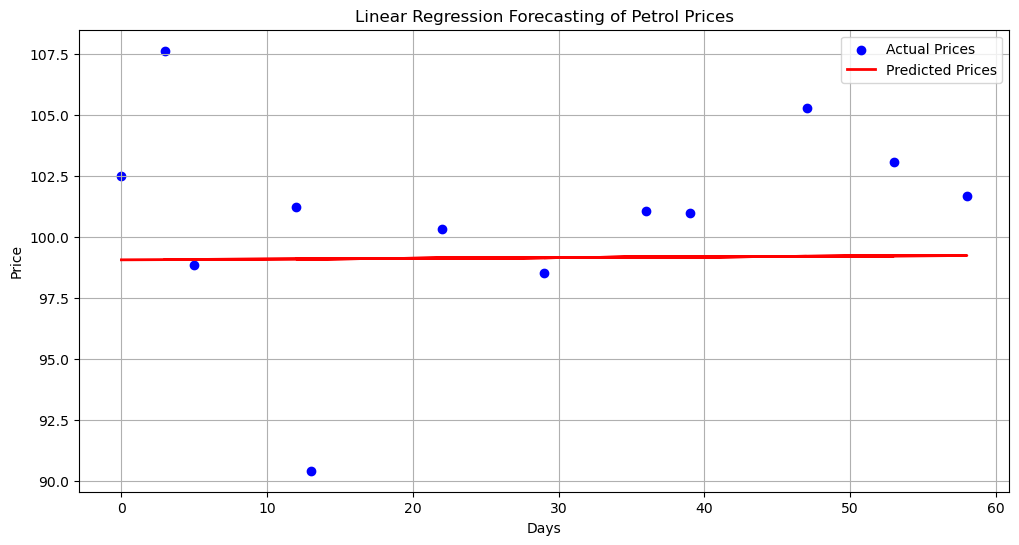

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate Synthetic Time Series Data
np.random.seed(42)
date_range = pd.date_range(start='2024-01-01', periods=60, freq='D')
prices = np.random.normal(loc=100, scale=5, size=60)

# Introduce missing values
missing_indices = np.random.choice(60, 6, replace=False)
prices[missing_indices] = np.nan

# Introduce outliers
outlier_indices = np.random.choice(60, 3, replace=False)
prices[outlier_indices] = [200, 250, 180]

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Price': prices})

# Save to CSV
csv_path = 'petrol_prices_timeseries.csv'
df.to_csv(csv_path, index=False)

# Step 2: Load Data
loaded_df = pd.read_csv(csv_path, parse_dates=['Date'])

# Step 3: Handle Missing Data
loaded_df['Price'].fillna(method='ffill', inplace=True)  # Forward fill

# Step 4: Detect & Remove Outliers
z_scores = np.abs(stats.zscore(loaded_df['Price']))
loaded_df = loaded_df[z_scores < 2]  # Keep values within 2 standard deviations

# Step 5: Normalize Data
scaler = MinMaxScaler()
loaded_df['Normalized_Price'] = scaler.fit_transform(loaded_df[['Price']])

# Step 6: Prepare Data for Linear Regression Model
loaded_df['Days'] = (loaded_df['Date'] - loaded_df['Date'].min()).dt.days
X = loaded_df[['Days']]
y = loaded_df['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize Predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Linear Regression Forecasting of Petrol Prices')
plt.legend()
plt.grid(True)
plt.show()
